<a href="https://colab.research.google.com/github/YukioChinen/Projeto-para-Calculo-de-Metricas-de-Avaliacao/blob/main/Projeto_para_C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import das bibliotecas

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

VP: 75, VN: 94, FP: 17, FN: 14
Acurácia: 0.845
Recall: 0.8468468468468469
Precisão: 0.8703703703703703
F1 Score: 0.8584474885844748
Especificidade: 0.8468468468468469


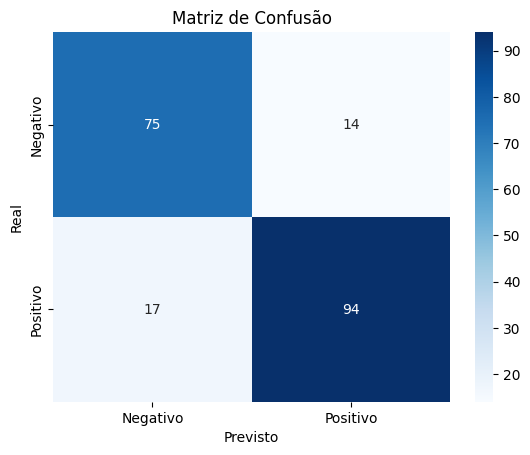

In [32]:
# Criando e treinando o modelo
x, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

conMat = confusion_matrix(y_test, y_pred)
VP, VN, FP, FN = conMat[0][0], conMat[1][1], conMat[1][0], conMat[0][1]


# Cálculo das métricas
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
if (VN + FP) != 0:
 esp = VN / (VN + FP)
else:
  esp = 0

# Print
print(f"VP: {VP}, VN: {VN}, FP: {FP}, FN: {FN}")
print(f"Acurácia: {acc}")
print(f"Recall: {rec}")
print(f"Precisão: {prec}")
print(f"F1 Score: {f1}")
print(f"Especificidade: {esp}")


# Matriz de Confusão
tick_labels = ["Negativo", "Positivo"]
sns.heatmap(conMat, annot=True, fmt="d", cmap="Blues", xticklabels=tick_labels, yticklabels=tick_labels)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()